# Introduction to Regression with Neural Networks in TensorFlow
There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter.. predicting a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.13.0


## Creating data to view ans fit

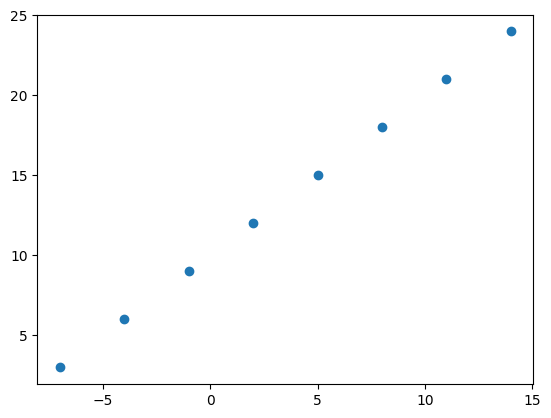

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0 ])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [ ]:
# Create a demo tnesor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NymPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in others words, the function with tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patters between X & y (features and labels).

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))


model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [ ]:
tf.random.set_seed(42)

# 1. Create  a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,   # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 856ms/step - loss: 14.4032 - mae: 14.4032
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 14.2707 - mae: 14.2707
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 14.1382 - mae: 14.1382
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 14.0057 - mae: 14.0057
Epoch 5/5
1/1 [==============================] - 0s 24ms/step - loss: 13.8732 - mae: 13.8732


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 306ms/step


array([[-1.3618397]], dtype=float32)

In [ ]:
y_pred + 11

array([[9.638161]], dtype=float32)

## Improving our model
We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layer, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Copiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 7.7013 - mae: 7.7013
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 7.5688 - mae: 7.5688
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 7.4850 - mae: 7.4850
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 7.4794 - mae: 7.4794
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 7.4738 - mae: 7.4738
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 7.4681 - mae: 7.4681
Epoch 7/100
1/1 [==============================] - 0s 39ms/step - loss: 7.4625 - mae: 7.4625
Epoch 8/100
1/1 [==============================] - 0s 36ms/step - loss: 7.4569 - mae: 7.4569
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 7.4513 - mae: 7.4513
Epoch 10/100
1/1 [==============================] - 0s 42ms/step - loss: 7.4456 - mae: 7.4456
Epoch 11/100
1/1 [==============================] - 0s 46ms/step - loss

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 244ms/step


array([[30.110147]], dtype=float32)

### Proving for myself

In [ ]:
#1 Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2 Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3 Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.3524 - mae: 14.3524
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.8087 - mae: 13.8087
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 13.2704 - mae: 13.2704
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.7324 - mae: 12.7324
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1963 - mae: 12.1963
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11.6508 - mae: 11.6508
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0952 - mae: 11.0952
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5288 - mae: 10.5288
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 9.9382 - mae: 9.9382
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 9.3165 - mae: 9.3165
Epoch 11/100
1/1 [==============================] - 0s 13

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 184ms/step


array([[31.709211]], dtype=float32)

In [ ]:
# Let's see if we can do another change for improve our model
#1.0 Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.0711 - mae: 14.0711
Epoch 2/100
1/1 [==============================] - 0s 36ms/step - loss: 14.0005 - mae: 14.0005
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 13.9299 - mae: 13.9299
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 13.8592 - mae: 13.8592
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 13.7885 - mae: 13.7885
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 13.7178 - mae: 13.7178
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 13.6470 - mae: 13.6470
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 13.5762 - mae: 13.5762
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 13.5053 - mae: 13.5053
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 13.4344 - mae: 13.4344
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 70ms/step


array([[30.543375]], dtype=float32)

## Evaluating a model
In practice, a typicall workflow you'll go through when building neural networks is:

```Build a model  -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ....```

When it comes to evaluation .. there are 3 word you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we woeking with? What does it look like?
* The model itself - what does our model look like?
* The trainig of a model - how does a model perform while it learns?
* The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

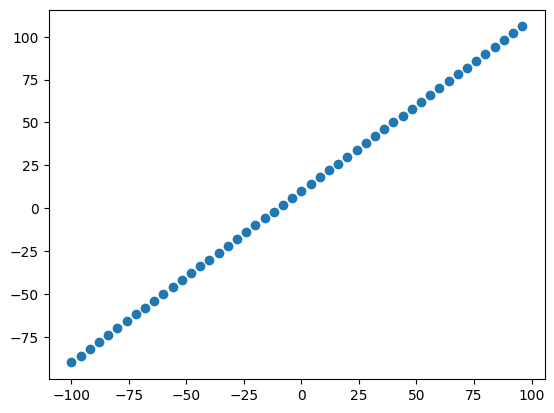

In [ ]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...
* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set**- the model gets tuned on this data, which is typically 10 - 15 % of the data available
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [ ]:
# Check the lenght of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples(80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

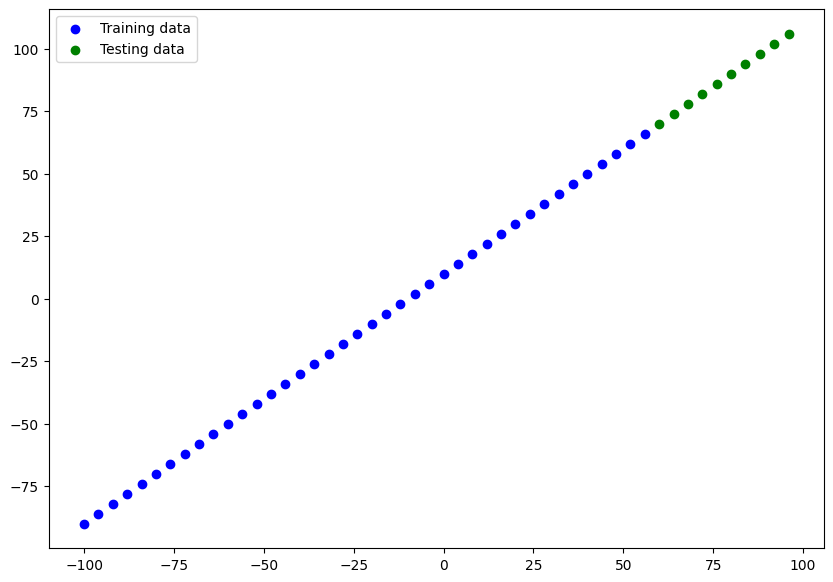

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs= 100)

### Visualizing the model

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**

**Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning.

**Exercise** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [ ]:
# Let's fit our modle to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


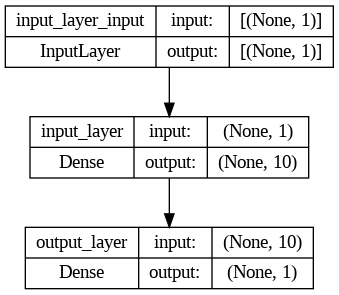

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 31ms/step


array([[ 76.57359 ],
       [ 81.561035],
       [ 86.54849 ],
       [ 91.53595 ],
       [ 96.52339 ],
       [101.51085 ],
       [106.4983  ],
       [111.485756],
       [116.47319 ],
       [121.46065 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the fucture, it's a good idea to turn it into a function

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plot training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testinf data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show the legend
  plt.legend();

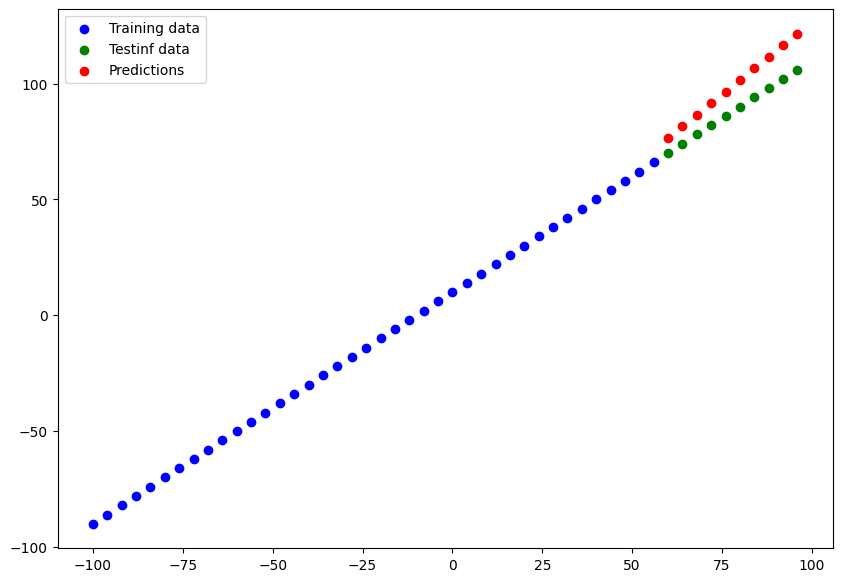

In [ ]:
plot_predictions(train_data = X_train,
                 train_labels= y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mena absolute error, "on average, how wrong is each of my model's predictions.
*MSE- mean square error, "square the average errors"

In [ ]:
# Evaluate the modle on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 148ms/step - loss: 11.0171 - mae: 11.0171


[11.017121315002441, 11.017121315002441]

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.metrics.mean_absolute_error(
    y_true=y_test,
    y_pred=tf.constant(y_pred)
)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.255844, 10.975586, 10.      , 10.30719 , 11.809357, 14.50651 ,
       18.498299, 23.485756, 28.47319 , 33.460648], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 76.57359 ],
       [ 81.561035],
       [ 86.54849 ],
       [ 91.53595 ],
       [ 96.52339 ],
       [101.51085 ],
       [106.4983  ],
       [111.485756],
       [116.47319 ],
       [121.46065 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.57359 ,  81.561035,  86.54849 ,  91.53595 ,  96.52339 ,
       101.51085 , 106.4983  , 111.485756, 116.47319 , 121.46065 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=11.01712>

In [ ]:
# Calculate the mean squeare error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=129.42117>

In [ ]:
# make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chanse find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. COmpile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 29.9170 - mae: 29.9170
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 8.4780 - mae: 8.4780
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 10.6486 - mae: 10.6486
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 13.2069 - mae: 13.2069
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.2816 - mae: 12.2816
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.5007 - mae: 9.5007
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6298 - mae: 8.6298
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0528 - mae: 9.0528
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.8931 - mae: 18.8931
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.1957 - mae: 10.1957
Epoch 11/100
2/2 [==============================] - 0s 9ms/step 

1/1 [==============================] - 0s 47ms/step


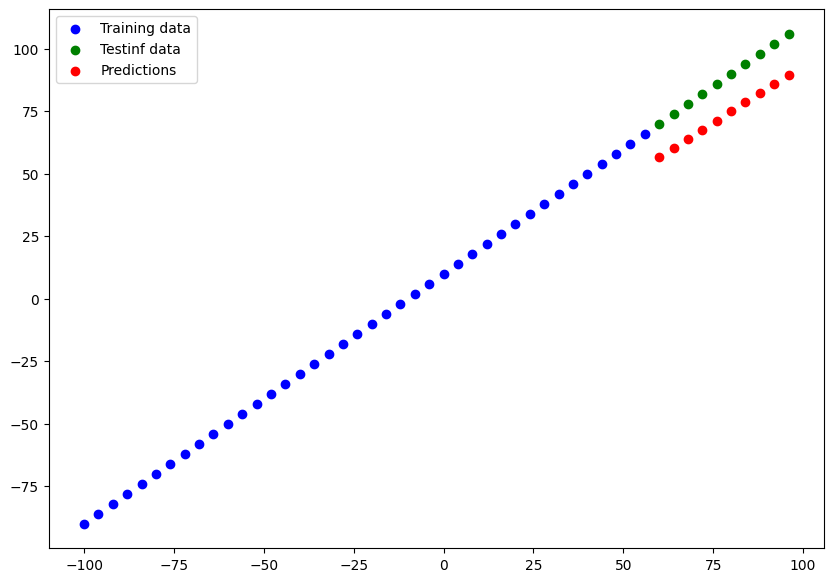

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.88315>,
 <tf.Tensor: shape=(), dtype=float32, numpy=222.33643>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create de model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 37.0010 - mse: 1895.1119
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 29.2807 - mse: 1138.2068
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 34.6411 - mse: 1791.0651
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 26.2708 - mse: 1003.6685
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 14.4166 - mse: 256.1701
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.5198 - mse: 151.7678
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.5718 - mse: 209.6680
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0216 - mse: 147.7960
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 39.4336 - mse: 2431.9180
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 26.9597 - mse: 1022.2598
Epoch 11/100
2/2 [========================

1/1 [==============================] - 0s 55ms/step


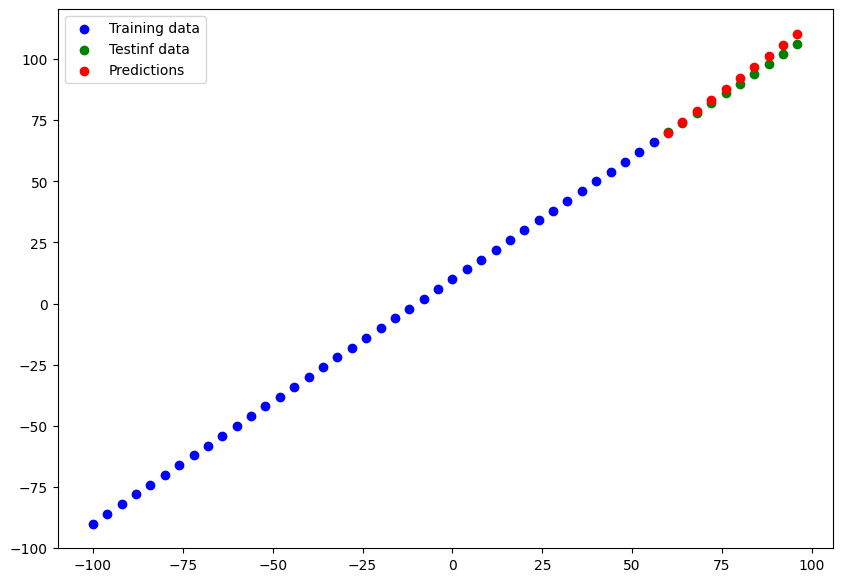

In [ ]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.04293>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.130998>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create de model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=("mae"))

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 19ms/step - loss: 49.5393 - mae: 49.5393
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 31.9114 - mae: 31.9114
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 36.8123 - mae: 36.8123
Epoch 4/500
2/2 [==============================] - 0s 12ms/step - loss: 27.9277 - mae: 27.9277
Epoch 5/500
2/2 [==============================] - 0s 13ms/step - loss: 15.2072 - mae: 15.2072
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 12.0905 - mae: 12.0905
Epoch 7/500
2/2 [==============================] - 0s 17ms/step - loss: 11.4106 - mae: 11.4106
Epoch 8/500
2/2 [==============================] - 0s 14ms/step - loss: 11.2004 - mae: 11.2004
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 41.6275 - mae: 41.6275
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 28.8725 - mae: 28.8725
Epoch 11/500
2/2 [==============================] - 0

1/1 [==============================] - 0s 57ms/step


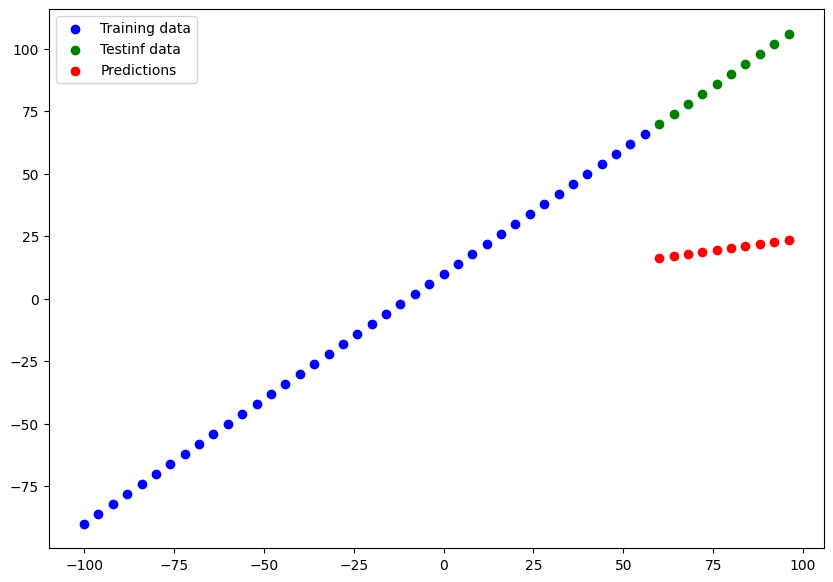

In [ ]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.16496>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4731.4253>)

**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results= [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.883150,222.336426
1,model_2,2.042930,6.130998
2,model_3,68.164963,4731.425293


Looks like `model_2` performed the best...

In [ ]:
model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                20        
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource**  as you build more models, you'll want to look into using:

* TensorBoard - a component od the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our models

Saving our models allows us to use them outside of google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading and saved model

In [90]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                20        
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
from json import load
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 215ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [94]:
# Compare the MAE of model_2 preds and loaded SavedModel_preds
mae(y_true = y_test, y_pred = model_2_preds) == mae(y_true = y_test, y_pred = loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [96]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                20        
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 133ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

1/1 [==============================] - 0s 42ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Download a model (or any other file) from Google Colab

If you want to download your files from Google colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".

2. Use code (see the cell below).

3. Save it to Google Drive by connecting Google Drive and copying it there (see second code cell below).

In [102]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive

In [105]:
!ls /content/drive/MyDrive

 01.drawio
 09.drawio
'1.0 ENSAYO MODELO.gdoc'
 13.drawio
 16.drawio
 19.drawio
 21.drawio
 23.drawio
 28.drawio
'3.0 ANDA PERFORACION DE POZOS .gdoc'
 apocalypse-1.rar
'Auto Call Recorder'
 best_model_HDF5_format.h5
'CASA CAMPO..dwg'
'CASA RIVERSIDE 2 Niveles 14 errores corregidos.dwg'
'Classification Model Selection'
 Classroom
'Colab Notebooks'
'Copia de Copia de My Workouts.gsheet'
'Copia de Flight Deals.gsheet'
'English Classes'
'Estudio técnico básico .pdf'
'Evaluating Regression Models'
'expo alcantarillas OH (1).pptx'
'expo alcantarillas OH.pptx'
 FB_IMG_1550272413542.jpg
'Formulario sin título.gform'
'Formulario sin título (respuestas).gsheet'
 GoToGate_FB.PDF
 GUIA_LINEAS-DE-TRANSMISION_SETENA.pdf
 IMG-20210501-WA0004.jpg
 IMG-20210501-WA0005.jpg
 IMG-20210504-WA0017.jpg
 IMG-20210504-WA0018.jpg
 IMG-20210504-WA0019.jpg
 IMG-20210504-WA0020.jpg
 IMG-20210504-WA0021.jpg
 IMG-20210504-WA0022.jpg
 IMG-20210504-WA0023.jpg
 IMG-20210504-WA0024.jpg
 IMG-20210504-WA0025.jpg
 IMG

## A larger Example

In [107]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [112]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [115]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [116]:
# Vie X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [117]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [120]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [121]:
0.2*1338

267.6

In [130]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13227.9336 - mae: 13227.9336
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12301.8574 - mae: 12301.8574
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12173.0547 - mae: 12173.0547
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12098.1631 - mae: 12098.1631
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11983.9902 - mae: 11983.9902
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11797.1113 - mae: 11797.1113
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11472.0996 - mae: 11472.0996
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10961.9082 - mae: 10961.9082
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10345.9414 - mae: 10345.9414
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9698.435

In [131]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8918.3555 - mae: 8918.3555


[8918.35546875, 8918.35546875]

In [134]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well.. let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam
2. Same as above but train for longer (200 epochs)
3. (inser your own experiment here)

In [137]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13291.8008 - mae: 13291.8008
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13126.5811 - mae: 13126.5811
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 12774.4678 - mae: 12774.4678
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12074.1846 - mae: 12074.1846
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 10905.8066 - mae: 10905.8066
Epoch 6/100
34/34 [==============================] - 0s 9ms/step - loss: 9434.5977 - mae: 9434.5977
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 8122.4170 - mae: 8122.4170
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7515.4854 - mae: 7515.4854
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7421.6924 - mae: 7421.6924
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7402.4844 - mae:

In [138]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4967.3511 - mae: 4967.3511


[4967.35107421875, 4967.35107421875]

In [139]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8918.3555 - mae: 8918.3555


[8918.35546875, 8918.35546875]

In [140]:
# Set random set
tf.random.set_seed(42)

#1. Create de model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13294.6494 - mae: 13294.6494
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13141.2881 - mae: 13141.2881
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12829.5020 - mae: 12829.5020
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12202.0811 - mae: 12202.0811
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11119.9766 - mae: 11119.9766
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9682.0303 - mae: 9682.0303
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8301.3096 - mae: 8301.3096
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7572.4224 - mae: 7572.4224
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7436.2554 - mae: 7436.2554
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7414.8833 - mae:

In [141]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3492.7583 - mae: 3492.7583


[3492.75830078125, 3492.75830078125]

In [142]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8918.3555 - mae: 8918.3555


[8918.35546875, 8918.35546875]

Text(0.5, 0, 'epochs')

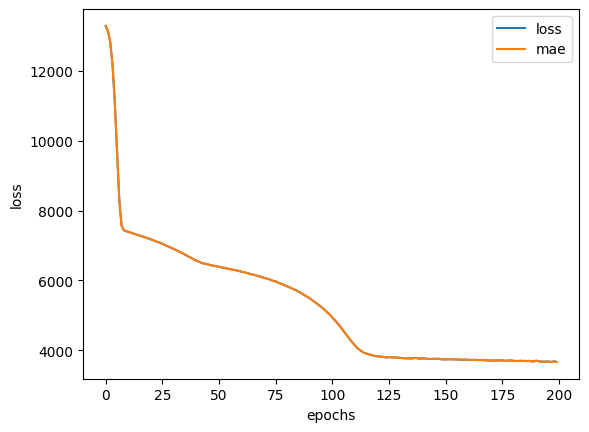

In [143]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question:** How long should you train for?

It depends. Really. ... It depends on the problem you're working on. However, many people have asked this question before.. so TensorFlow has a solution! It's called the EarlyStopping Callback (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), wich is a TensorFlow component you can add to your model to stop training on improving certain metric.

# Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

<Axes: ylabel='Frequency'>

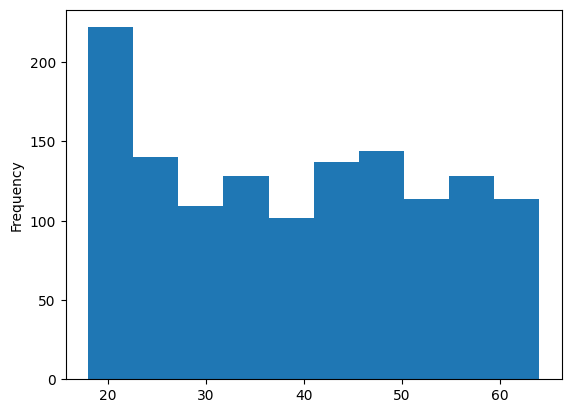

In [144]:
X["age"].plot(kind="hist")

In [146]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [150]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [148]:
# what does our data look like now?
X_train.loc[0]

age                 19.0
bmi                 27.9
children             0.0
sex_female           1.0
sex_male             0.0
smoker_no            0.0
smoker_yes           1.0
region_northeast     0.0
region_northwest     0.0
region_southeast     0.0
region_southwest     1.0
Name: 0, dtype: float64

In [151]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [152]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [153]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

#1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13343.8721 - mae: 13343.8721
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13334.7715 - mae: 13334.7715
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13312.2881 - mae: 13312.2881
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13265.8525 - mae: 13265.8525
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13184.4346 - mae: 13184.4346
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13056.8711 - mae: 13056.8711
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12872.5938 - mae: 12872.5938
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12621.4746 - mae: 12621.4746
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12293.4541 - mae: 12293.4541
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11885.81

In [154]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3433.7869 - mae: 3433.7869


[3433.786865234375, 3433.786865234375]